In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Checking Null Values

In [4]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# Outlier Checking

In [5]:
df['Region'].unique()

array([3, 1, 2], dtype=int64)

In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


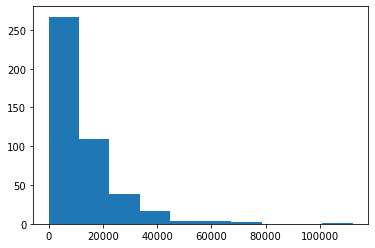

In [7]:
plt.hist(df['Fresh'])
plt.show()

In [8]:
Q1,Q3 = np.percentile(df['Fresh'],[25,75])
IQR = Q3-Q1

In [9]:
max = Q3 + 1.5*IQR
min = Q1 - 1.5*IQR

In [10]:
min, max

(-17581.25, 37642.75)

In [11]:
df['Fresh'].quantile(.98)

46047.659999999945

In [12]:
df[df['Fresh'] > 46047.65].index

Int64Index([39, 103, 125, 181, 239, 258, 259, 282, 284], dtype='int64')

In [13]:
df.shape

(440, 8)

In [14]:
x= df['Fresh'].mean()

In [15]:
i=0
for i in range(440):
    if df['Fresh'][i] > 46047.65:
        df['Fresh'][i] = x
        i+=1

In [16]:
df['Fresh'][103]

12000.297727272728

In [17]:
df['Milk'].quantile(.98)

27659.879999999976

In [18]:
df[df['Milk'] > 26216.199999999953].index

Int64Index([23, 47, 56, 61, 85, 86, 92, 181, 183, 211], dtype='int64')

In [19]:
x= df['Milk'].mean()

In [20]:
i=0
for i in range(440):
    if df['Milk'][i] > 27659.879999999976:
        df['Milk'][i] = x
        i+=1

C:\Users\bibin\AppData\Local\Temp\ipykernel_3004\4163093137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Milk'][i] = x


In [21]:
df['Grocery'].quantile(.98)

32437.839999999956

In [22]:
df[df['Grocery'] > 28623.81999999999].index

Int64Index([47, 49, 61, 65, 85, 86, 92, 109, 145, 211, 216, 251, 333, 437], dtype='int64')

In [23]:
x= df['Grocery'].mean()

In [24]:
i=0
for i in range(440):
    if df['Grocery'][i] > 32437.839999999956:
        df['Grocery'][i] = x
        i+=1

C:\Users\bibin\AppData\Local\Temp\ipykernel_3004\3816078837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grocery'][i] = x


In [25]:
df['Frozen'].quantile(.98)

15807.139999999972

In [26]:
df[df['Frozen'] > 13280.859999999991].index

Int64Index([93, 103, 125, 181, 183, 196, 277, 325, 338, 413, 425, 427, 431], dtype='int64')

In [27]:
x= df['Frozen'].mean()

In [28]:
i=0
for i in range(440):
    if df['Frozen'][i] > 15807.139999999972:
        df['Frozen'][i] = x
        i+=1

C:\Users\bibin\AppData\Local\Temp\ipykernel_3004\4170324903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frozen'][i] = x


In [29]:
df['Detergents_Paper'].quantile(.98)

17927.879999999976

In [30]:
df[df['Detergents_Paper'] > 12007.712227272727].index

Int64Index([ 47,  49,  56,  61,  65,  77,  85,  86,  92, 145, 163, 201, 209,
            211, 216, 251, 312, 319, 333, 343, 349, 351, 437],
           dtype='int64')

In [31]:
x= df['Detergents_Paper'].mean()

In [32]:
i=0
for i in range(440):
    if df['Detergents_Paper'][i] > 17927.879999999976:
        df['Detergents_Paper'][i] = x
        i+=1

C:\Users\bibin\AppData\Local\Temp\ipykernel_3004\2016370984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Detergents_Paper'][i] = x


In [33]:
df['Delicassen'].quantile(.98)

6276.8399999999965

In [34]:
df[df['Delicassen'] > 6276.8399999999965].index

Int64Index([2, 23, 47, 71, 87, 181, 183, 202, 218], dtype='int64')

In [35]:
x= df['Delicassen'].mean()

In [36]:
i=0
for i in range(440):
    if df['Delicassen'][i] > 6276.8399999999965:
        df['Delicassen'][i] = x
        i+=1

C:\Users\bibin\AppData\Local\Temp\ipykernel_3004\4178214544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Delicassen'][i] = x


In [37]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,10937.976544,5049.959985,7055.660217,2595.632696,2415.405542,1262.029168
std,0.468052,0.774272,9799.363862,4770.849820,6579.839151,2831.294116,3256.285951,1153.049686
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,15940.000000,6847.500000,9800.250000,3252.500000,3599.750000,1726.750000
max,2.000000,3.000000,45640.000000,27472.000000,32114.000000,15601.000000,17740.000000,6250.000000


# Standardization

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scalar = StandardScaler()

In [40]:
df_new = df[['Fresh','Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [41]:
df_new.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.000000
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.000000
2,6353.0,8808.0,7684.0,2405.0,3516.0,1524.870455
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.000000
4,22615.0,5410.0,7198.0,3915.0,1777.0,5185.000000


In [42]:
s_df_new = scalar.fit_transform(df_new)

In [43]:
df_new = pd.DataFrame(s_df_new,columns=df_new.columns)

In [44]:
df_new.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.176848,0.966554,0.076889,-0.842139,0.079504,0.065962
1,-0.396495,0.998870,0.382259,-0.294770,0.269815,0.446256
2,-0.468418,0.788605,0.095603,-0.067407,0.338375,0.228213
3,0.237737,-0.808734,-0.431300,1.346629,-0.586735,0.456676
4,1.192967,0.075553,0.021657,0.466525,-0.196276,3.406129


In [45]:
#df_new['Channel']=df['Channel']
#df_new['Region']=df['Region']

In [46]:
df_new.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.176848,0.966554,0.076889,-0.842139,0.079504,0.065962
1,-0.396495,0.998870,0.382259,-0.294770,0.269815,0.446256
2,-0.468418,0.788605,0.095603,-0.067407,0.338375,0.228213
3,0.237737,-0.808734,-0.431300,1.346629,-0.586735,0.456676
4,1.192967,0.075553,0.021657,0.466525,-0.196276,3.406129


# K Means Clustering

In [47]:
from sklearn.cluster import KMeans

In [48]:
ks = range(1,12)
inertia = []
for i in ks:
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(df_new)
    inertia.append(model.inertia_)
    i+=1

C:\Users\bibin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


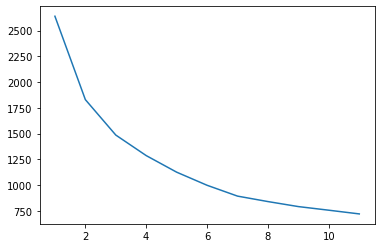

In [49]:
plt.plot(ks,inertia)
plt.show()

In [50]:
kmeans = KMeans(n_clusters=8)
model = kmeans.fit(df_new)
clusters = model.predict(df_new)
print(clusters)

[0 0 0 1 3 7 7 3 7 2 0 7 3 0 3 7 0 3 3 7 3 7 6 5 4 7 7 7 4 5 3 7 7 5 7 0 3
 0 2 6 6 3 0 2 0 4 2 5 0 2 1 7 5 0 5 7 2 0 7 0 7 5 0 0 7 0 7 0 3 7 6 0 1 1
 0 1 1 2 7 7 7 0 0 7 7 3 0 5 1 3 7 1 4 3 0 7 7 7 7 1 0 0 0 3 7 7 0 2 0 0 7
 0 6 7 7 7 7 7 1 7 7 7 7 0 5 7 1 3 7 5 1 7 7 7 7 7 0 7 3 7 3 5 5 1 7 3 7 7
 7 5 7 7 7 7 7 2 0 7 0 0 0 7 7 2 0 2 3 7 7 7 0 4 7 2 7 0 5 3 7 1 3 0 0 5 7
 7 7 1 0 0 1 7 7 0 7 1 5 0 7 7 2 2 5 7 7 2 7 0 7 2 3 3 7 0 0 0 2 7 0 7 7 0
 1 1 7 7 3 7 7 1 1 7 5 7 3 7 7 1 7 1 6 5 7 3 0 0 7 7 7 1 7 4 1 5 4 5 7 1 3
 7 7 1 7 7 0 4 0 3 0 7 1 7 7 5 7 7 5 7 1 3 7 3 1 6 6 5 7 1 7 5 7 7 7 0 3 7
 7 7 0 7 3 2 0 0 2 0 2 7 7 2 6 5 2 1 7 4 7 7 7 2 7 7 7 7 5 4 7 7 1 1 7 2 3
 0 6 5 7 1 6 1 0 0 0 2 7 7 0 5 7 2 7 2 7 2 1 7 7 0 4 7 7 7 7 7 7 3 7 7 7 7
 5 1 3 3 7 7 0 5 7 7 5 1 5 7 4 7 7 7 7 7 1 7 7 1 7 7 0 1 1 7 7 6 5 5 1 7 6
 2 7 3 7 3 0 3 1 0 0 0 0 7 0 3 5 7 0 6 0 6 7 3 0 6 7 7 7 6 5 2 7 7]


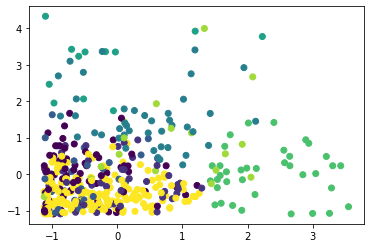

In [51]:
fr = df_new['Fresh']
dl = df_new['Delicassen']
plt.scatter(fr,dl,c=clusters)
#legend1 = df_new.legend(scatter.legend_elements(),loc="lower left", title="Classes")
#df_new.add_artist(legend1)
#legend2 = df_new.legend(handles, labels, loc="upper right", title="Sizes")

# Agglomerative Clustering

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage

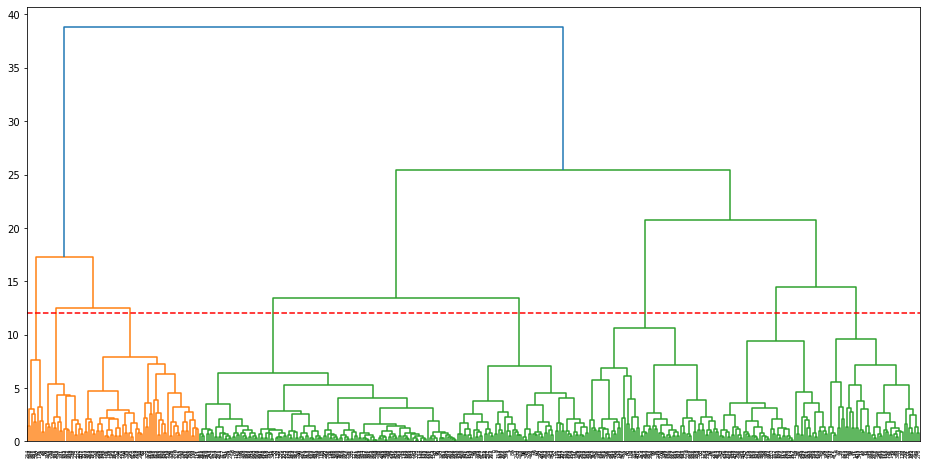

In [53]:
link = linkage(df_new,method='ward')
plt.figure(figsize=(16,8))
dendrogram(link,orientation='top',distance_sort='ascending', show_leaf_counts=True)
plt.hlines(12,0,5000,colors='r',linestyles='dashed')
plt.show()


In [54]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
cluster = AgglomerativeClustering(n_clusters=8,affinity='euclidean',linkage='ward')
model=cluster.fit_predict(df_new)

In [56]:
model

array([3, 3, 3, 0, 2, 3, 3, 3, 6, 1, 1, 6, 2, 2, 2, 6, 1, 2, 2, 3, 2, 6,
       0, 2, 2, 3, 6, 6, 4, 5, 2, 6, 5, 2, 6, 3, 2, 1, 1, 0, 0, 2, 1, 7,
       1, 4, 1, 5, 3, 7, 0, 3, 5, 1, 5, 6, 7, 1, 6, 3, 3, 2, 3, 1, 6, 1,
       3, 2, 0, 6, 0, 2, 0, 0, 3, 5, 0, 7, 6, 6, 6, 1, 3, 5, 3, 2, 2, 5,
       0, 2, 6, 0, 4, 0, 1, 6, 3, 6, 6, 0, 1, 1, 3, 0, 6, 5, 3, 1, 3, 1,
       5, 1, 0, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 1, 5, 6, 0, 2, 3, 5, 0, 6,
       6, 6, 6, 6, 3, 3, 2, 6, 2, 2, 5, 0, 5, 1, 6, 6, 6, 5, 5, 6, 5, 3,
       6, 7, 1, 5, 3, 1, 3, 6, 6, 7, 3, 1, 1, 6, 6, 6, 1, 4, 3, 1, 6, 3,
       5, 2, 3, 0, 2, 1, 1, 2, 6, 3, 6, 3, 1, 1, 0, 6, 6, 1, 6, 0, 2, 3,
       6, 6, 7, 7, 2, 6, 6, 7, 6, 3, 3, 7, 5, 0, 6, 3, 1, 1, 1, 5, 1, 6,
       6, 1, 0, 0, 6, 6, 2, 6, 6, 0, 0, 3, 5, 3, 0, 3, 6, 5, 6, 0, 0, 5,
       5, 6, 3, 1, 6, 6, 5, 0, 6, 4, 0, 2, 4, 5, 3, 0, 0, 6, 3, 0, 5, 0,
       1, 4, 1, 2, 1, 6, 0, 6, 3, 5, 6, 6, 2, 6, 0, 2, 6, 2, 0, 0, 0, 5,
       6, 0, 6, 5, 6, 6, 6, 1, 5, 6, 5, 3, 3, 6, 2,

In [57]:
df.shape

(440, 8)

In [58]:
model_shape = model.reshape(440,-1)

In [59]:
df_new['Cluster'] = model_shape

In [60]:
df_new.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.176848,0.966554,0.076889,-0.842139,0.079504,0.065962,3
1,-0.396495,0.998870,0.382259,-0.294770,0.269815,0.446256,3
2,-0.468418,0.788605,0.095603,-0.067407,0.338375,0.228213,3
3,0.237737,-0.808734,-0.431300,1.346629,-0.586735,0.456676,0
4,1.192967,0.075553,0.021657,0.466525,-0.196276,3.406129,2


# PCA

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=2)

In [63]:
pca.fit(df_new)

PCA(n_components=2)

In [64]:
x_pca = pca.transform(df_new)

In [65]:
x_pca.shape

(440, 2)

In [66]:
x_pca

array([[ 4.70046651e-01,  6.91288005e-01],
       [ 6.68525157e-01,  1.00706650e+00],
       [ 6.24772046e-01,  7.10159732e-01],
       [ 3.48799570e+00, -1.74102963e+00],
       [ 2.08316129e+00, -1.84100183e-01],
       [ 4.10794474e-01,  2.37567494e-01],
       [ 1.99050609e-01, -3.64362096e-02],
       [ 6.28746037e-01,  5.96283911e-01],
       [-2.67411384e+00,  2.32803164e-01],
       [ 2.82877518e+00,  2.49873241e+00],
       [ 2.72136715e+00,  8.84771002e-01],
       [-2.73301748e+00, -6.47794170e-01],
       [ 1.86540175e+00,  1.14616774e+00],
       [ 1.65659635e+00,  9.77144913e-01],
       [ 1.68854901e+00,  1.15602063e+00],
       [-2.83076865e+00, -4.83100799e-01],
       [ 2.37461876e+00,  1.29733380e+00],
       [ 1.63859844e+00, -1.15350477e-01],
       [ 1.77382061e+00,  3.47150090e-01],
       [ 2.00025289e-01,  6.94528830e-02],
       [ 1.39976325e+00, -3.71549199e-01],
       [-2.65910932e+00, -9.26176002e-01],
       [ 4.16114247e+00, -1.73026029e+00],
       [ 1.

In [67]:
pca.explained_variance_ratio_

array([0.51833186, 0.21751775])

In [68]:
pd.DataFrame(pca.components_,columns=df_new.columns,index=['PC-1','PC-2'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
PC-1,0.032901,0.135079,0.105272,0.202647,0.063035,0.152280,-0.949400
PC-2,-0.219129,0.482360,0.552316,-0.273512,0.554289,0.131789,0.121838


In [69]:
cluster = AgglomerativeClustering(n_clusters=8,affinity='euclidean',linkage='ward')
model1=cluster.fit_predict(x_pca)

In [70]:
model1

array([0, 0, 0, 2, 6, 0, 0, 0, 4, 1, 1, 4, 6, 6, 6, 4, 1, 6, 6, 0, 6, 4,
       2, 6, 1, 0, 4, 4, 7, 5, 6, 4, 5, 6, 4, 0, 6, 1, 1, 2, 2, 6, 1, 3,
       6, 7, 1, 5, 0, 3, 2, 0, 5, 1, 5, 4, 3, 1, 4, 0, 0, 6, 0, 1, 4, 1,
       0, 6, 2, 4, 2, 6, 2, 2, 0, 5, 2, 3, 4, 4, 4, 1, 0, 5, 0, 6, 1, 5,
       2, 6, 4, 2, 7, 2, 1, 4, 0, 4, 4, 2, 1, 1, 0, 2, 4, 5, 0, 1, 0, 1,
       5, 1, 2, 5, 5, 4, 4, 4, 5, 4, 5, 4, 4, 6, 5, 4, 2, 6, 0, 5, 2, 4,
       4, 4, 4, 4, 0, 0, 6, 4, 6, 6, 5, 2, 5, 1, 4, 4, 4, 5, 5, 4, 5, 0,
       4, 3, 1, 5, 0, 1, 0, 4, 4, 3, 0, 1, 1, 4, 4, 4, 1, 7, 0, 1, 4, 0,
       5, 6, 0, 2, 6, 1, 1, 6, 4, 0, 4, 0, 1, 1, 2, 4, 4, 1, 4, 2, 6, 0,
       4, 4, 3, 3, 6, 4, 4, 3, 4, 0, 0, 3, 5, 2, 4, 0, 1, 1, 1, 5, 1, 4,
       4, 6, 2, 2, 4, 4, 6, 4, 4, 2, 2, 0, 5, 0, 2, 0, 4, 5, 4, 2, 2, 5,
       5, 4, 0, 1, 4, 4, 5, 2, 4, 0, 2, 6, 0, 5, 0, 2, 2, 4, 0, 2, 5, 2,
       1, 0, 1, 6, 1, 4, 2, 4, 0, 5, 4, 4, 6, 4, 2, 6, 4, 6, 2, 2, 2, 5,
       4, 2, 4, 5, 4, 4, 4, 1, 5, 4, 5, 0, 0, 4, 6,

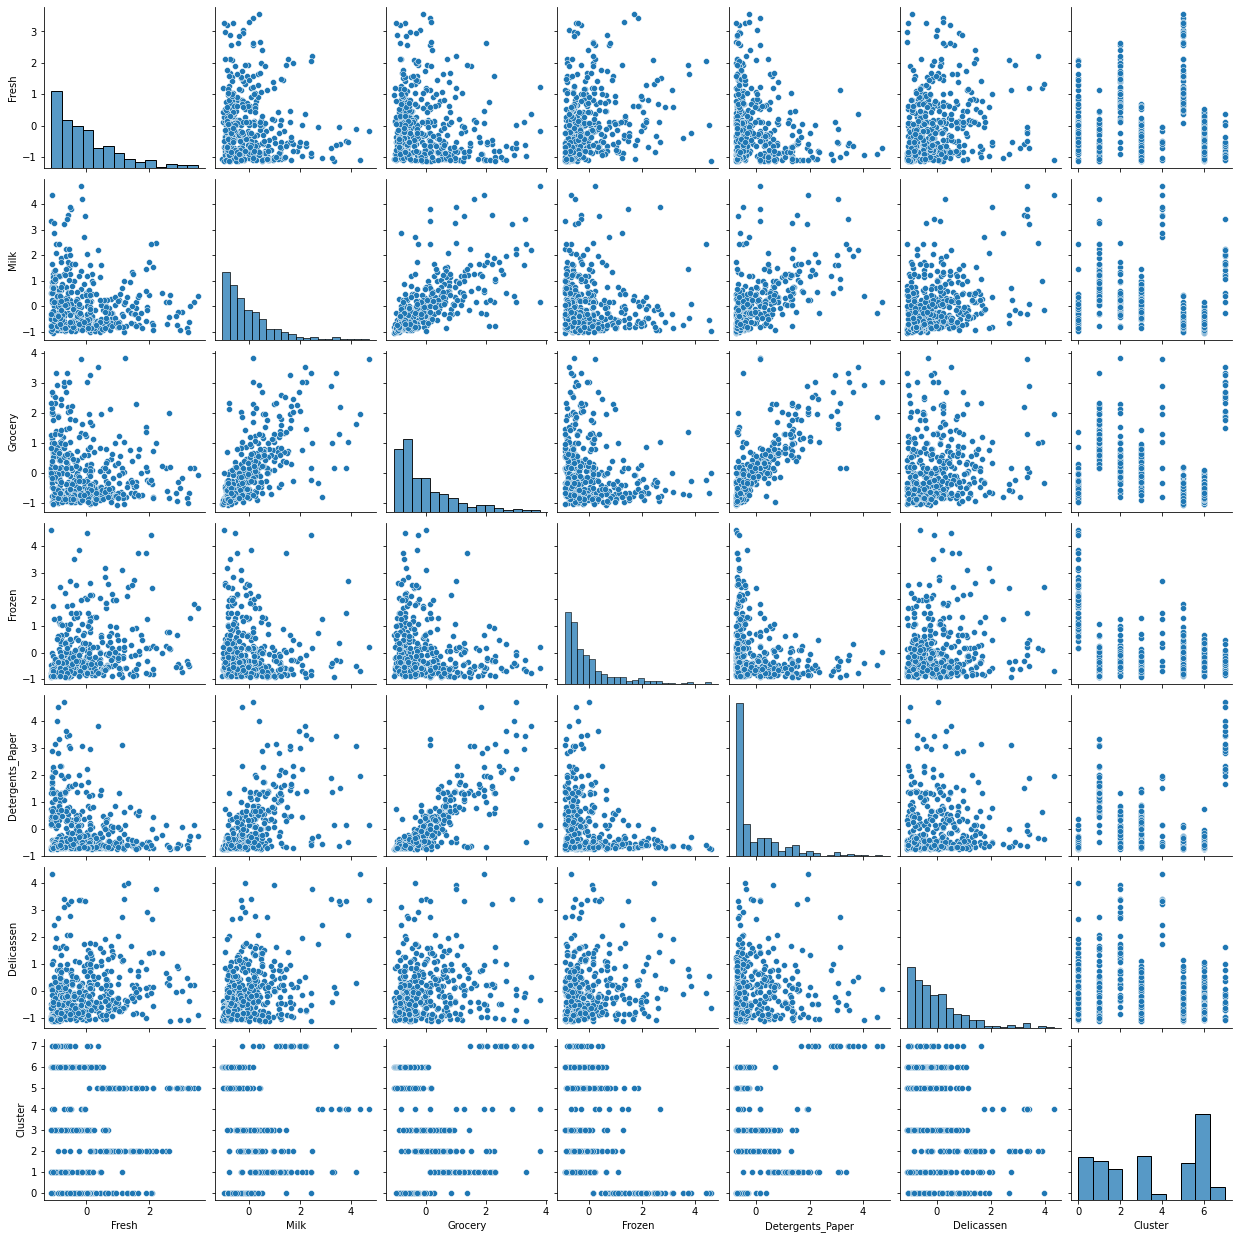

In [71]:
sns.pairplot(df_new)